In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [9]:
Final_data = pd.read_csv('preprocessed_data.csv',index_col=0)

In [10]:
Final_data.head()

,Age,New_Education,Marital_Status,Kids,Income,Total_amount_spent,Accepted_campaign,Number_of_purchases,Complain
0,68,0,4,0,58138.0,1617,0,25,0
1,71,0,4,2,46344.0,27,0,6,0
2,60,0,5,0,71613.0,776,0,21,0
3,41,0,5,1,26646.0,53,0,8,0
4,44,2,3,1,58293.0,422,0,19,0


In [11]:
Final_data.shape

(2229, 9)

#### Observation:
- Final_data has 2229 rows and 8 columns

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(Final_data, test_size = 0.2, random_state = 1)

In [13]:
print(train_data.shape)
print(test_data.shape)

(1783, 9)
(446, 9)


In [14]:
from sklearn.preprocessing import StandardScaler

col = ['Age','Income','Total_amount_spent','Number_of_purchases']
scale = StandardScaler()

for column in col:
    train_data[column] = scale.fit_transform(train_data[[column]])
    test_data[column] = scale.transform(test_data[[column]])

In [15]:
train_data.head()

,Age,New_Education,Marital_Status,Kids,Income,Total_amount_spent,Accepted_campaign,Number_of_purchases,Complain
1271,-0.757413,0,2,0,1.000941,0.993769,1,0.940302,0
902,-1.440287,2,3,0,-0.270358,-0.678970,0,-0.641730,0
2219,-0.245258,0,3,2,-1.323988,-0.929965,0,-1.037239,0
1922,1.888722,2,3,1,0.786410,-0.316796,0,0.017450,0
67,-0.842773,3,4,1,1.802528,1.131901,2,2.258663,0


## K-Means clustering

In [16]:
kmeans = KMeans()

In [17]:
wcss = []
silhouette_coeff = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1)
    kmeans.fit(train_data)
    wcss.append(kmeans.inertia_)
    if k==1:
        silhouette_coeff.append(None)
    else:
        score = silhouette_score(train_data, kmeans.labels_)
        silhouette_coeff.append(score)

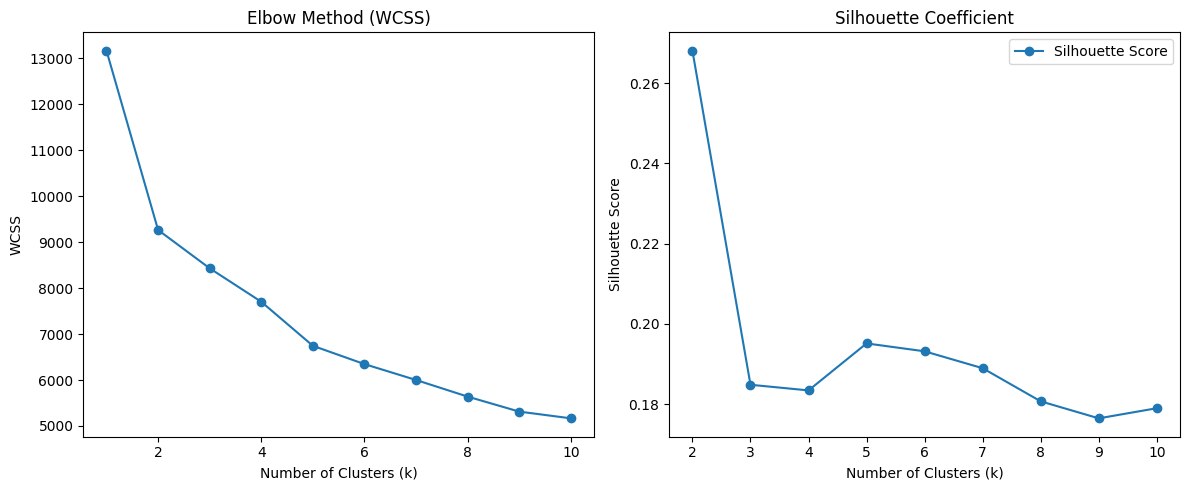

In [18]:
plt.figure(figsize=(12, 5))

# Plot WCSS
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")

# Plot Silhouette Coefficient
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_coeff[1:], marker='o', label="Silhouette Score")  # Exclude k=1
plt.title("Silhouette Coefficient")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
silhouette_coeff

[None,
 np.float64(0.2681031803646603),
 np.float64(0.18479679546699326),
 np.float64(0.18338967442340168),
 np.float64(0.19510816940945958),
 np.float64(0.19314089120990893),
 np.float64(0.18892710446784422),
 np.float64(0.18066604600714592),
 np.float64(0.17642426335127162),
 np.float64(0.1789464933472577)]

In [20]:
# Predicting using k-means algorithm.
kmeans = KMeans(n_clusters = 2, random_state = 1,init = 'k-means++').fit(train_data)
pred = kmeans.predict(train_data)

# Appending those cluster value into main DataFrame
train_data['kmeans_cluster_pred'] = pred + 1

In [21]:
train_data.head()

,Age,New_Education,Marital_Status,Kids,Income,Total_amount_spent,Accepted_campaign,Number_of_purchases,Complain,kmeans_cluster_pred
1271,-0.757413,0,2,0,1.000941,0.993769,1,0.940302,0,1
902,-1.440287,2,3,0,-0.270358,-0.678970,0,-0.641730,0,2
2219,-0.245258,0,3,2,-1.323988,-0.929965,0,-1.037239,0,2
1922,1.888722,2,3,1,0.786410,-0.316796,0,0.017450,0,1
67,-0.842773,3,4,1,1.802528,1.131901,2,2.258663,0,1


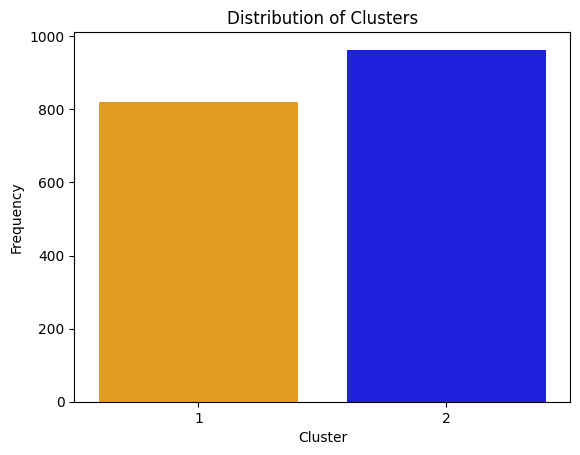

In [22]:
# Frequency of cluster
sns.countplot(x = train_data['kmeans_cluster_pred'], palette = ['orange','blue'])
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

#### Observations:
- cluster 2 have more members

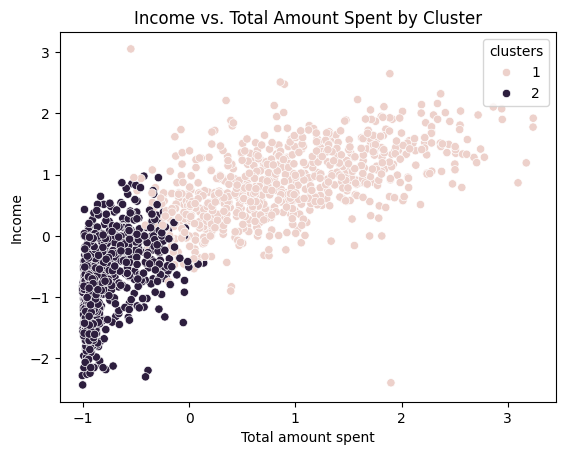

In [23]:
sns.scatterplot(x = train_data['Total_amount_spent'],y = train_data['Income'],hue=train_data['kmeans_cluster_pred'])
plt.legend(title = 'clusters',loc='upper right')
plt.xlabel('Total amount spent')
plt.ylabel('Income')
plt.title('Income vs. Total Amount Spent by Cluster')
plt.show()

## PCA

In [24]:
columns_to_drop = ['kmeans_cluster_pred']  

# Drop unnecessary columns from train and test data
train_data_cleaned = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data_cleaned = test_data.drop(columns=columns_to_drop, errors='ignore')

# Apply PCA
pca = PCA(n_components=2)
train_data_pca = pca.fit_transform(train_data_cleaned)  # Fit PCA on training data
test_data_pca = pca.transform(test_data_cleaned)

## KMeans with PCA

In [25]:
wcss = []
silhouette_coeff = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1)
    kmeans.fit(train_data_pca)
    wcss.append(kmeans.inertia_)
    if k==1:
        silhouette_coeff.append(None)
    else:
        score = silhouette_score(train_data_pca, kmeans.labels_)
        silhouette_coeff.append(score)

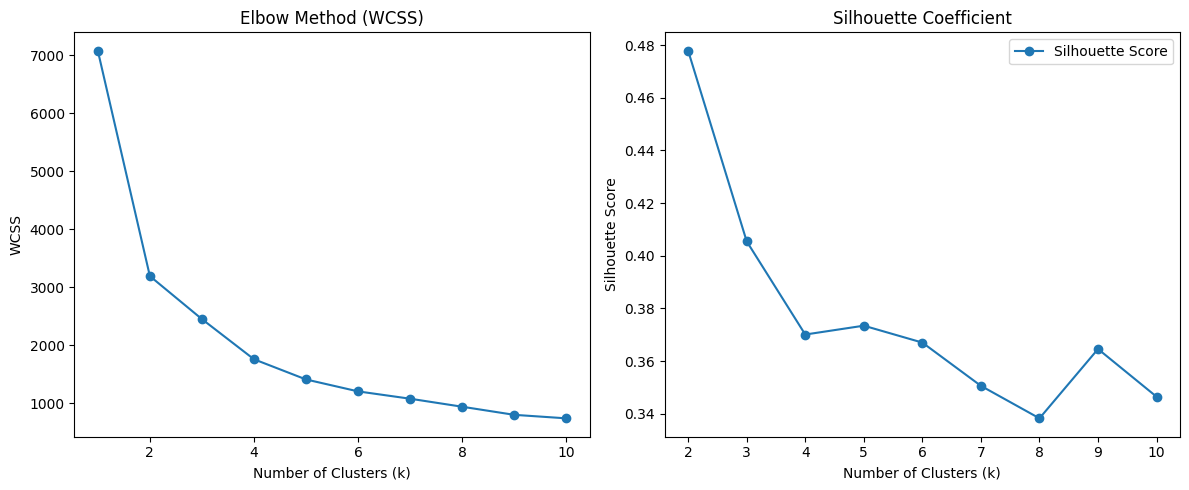

In [26]:
plt.figure(figsize=(12, 5))

# Plot WCSS
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")

# Plot Silhouette Coefficient
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_coeff[1:], marker='o', label="Silhouette Score")  
plt.title("Silhouette Coefficient")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
silhouette_coeff

[None,
 np.float64(0.47785714253777295),
 np.float64(0.4054622501617833),
 np.float64(0.3700718568287763),
 np.float64(0.3734349557288354),
 np.float64(0.3670127684218018),
 np.float64(0.35058766044595063),
 np.float64(0.3382458943472037),
 np.float64(0.36457633302784936),
 np.float64(0.34645671112067317)]

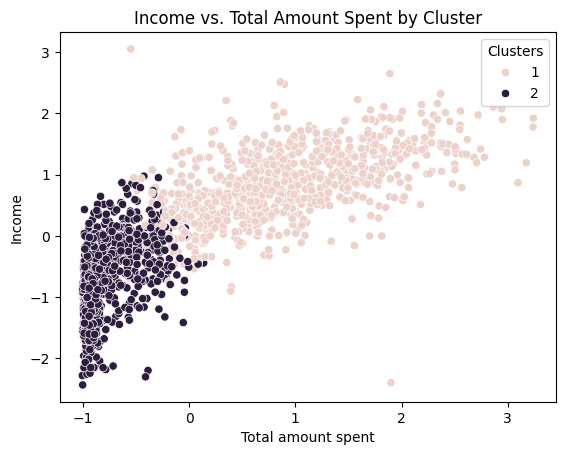

In [28]:
sns.scatterplot(y = train_data['Income'], x = train_data['Total_amount_spent'], hue = train_data['kmeans_cluster_pred'])
plt.legend(title = 'Clusters',loc='upper right')
plt.xlabel('Total amount spent')
plt.ylabel('Income')
plt.title('Income vs. Total Amount Spent by Cluster')
plt.show()

## Agglomerative Clustering with PCA

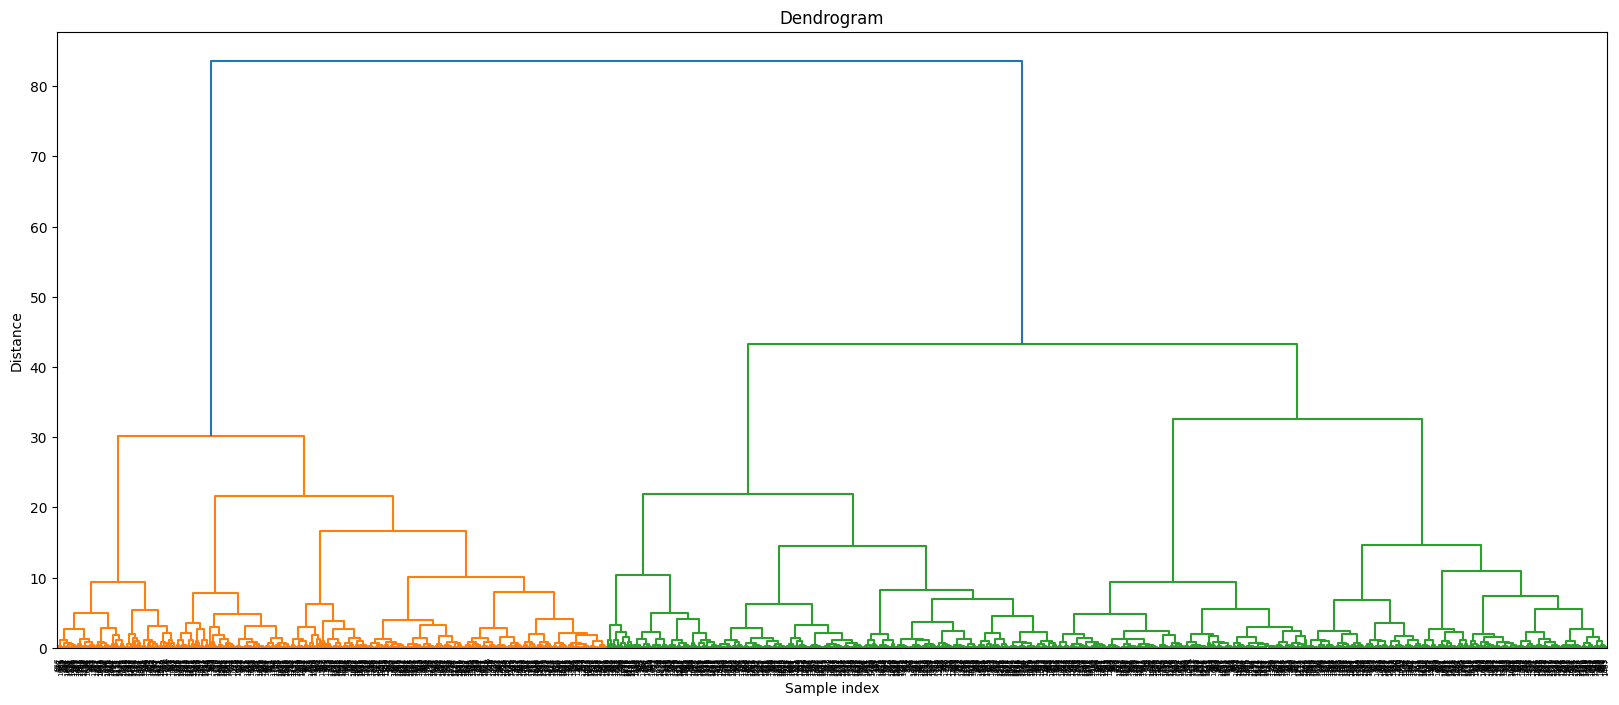

In [29]:
plt.figure(figsize = (20,8))
dendrogram(linkage(train_data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#### Observation:
- From Dendrogram, we can take k = 2

In [30]:
agglo = AgglomerativeClustering(n_clusters=2, linkage = "ward")
agglo.fit(train_data_pca)
score = silhouette_score(train_data_pca, agglo.labels_)
round(score, 4)

np.float64(0.4327)

In [31]:
pred = agglo.fit_predict(train_data_pca)
train_data['Agglo_cluster_pred'] = pred+1

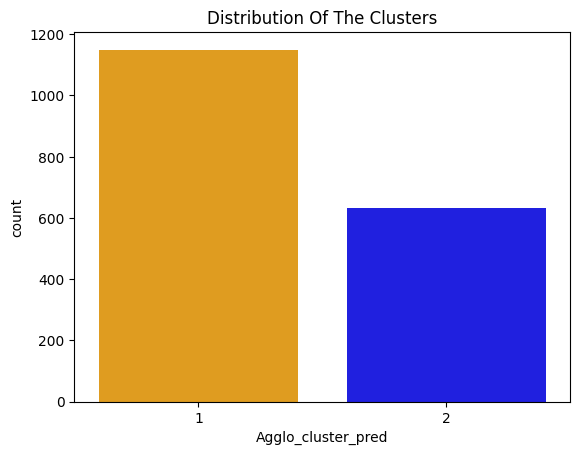

In [32]:
sns.countplot(x=train_data['Agglo_cluster_pred'], palette = ['orange','blue'])
plt.title("Distribution Of The Clusters")
plt.show()

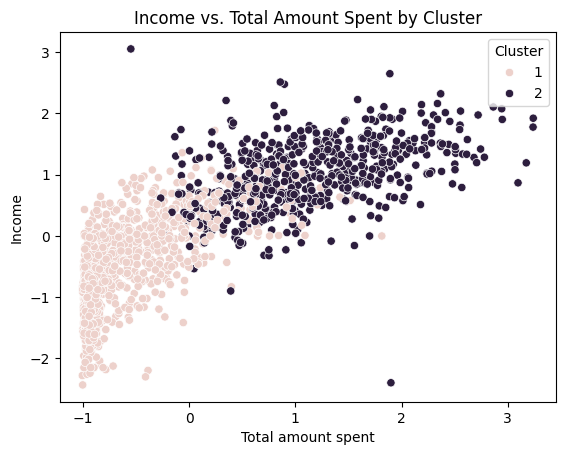

In [33]:
sns.scatterplot(y = train_data['Income'], x = train_data['Total_amount_spent'], hue = train_data['Agglo_cluster_pred'])
plt.legend(title = 'Cluster',loc='upper right')
plt.xlabel('Total amount spent')
plt.ylabel('Income')
plt.title('Income vs. Total Amount Spent by Cluster')
plt.show()

In [34]:
train_data.head()

,Age,New_Education,Marital_Status,Kids,Income,Total_amount_spent,Accepted_campaign,Number_of_purchases,Complain,kmeans_cluster_pred,Agglo_cluster_pred
1271,-0.757413,0,2,0,1.000941,0.993769,1,0.940302,0,1,2
902,-1.440287,2,3,0,-0.270358,-0.678970,0,-0.641730,0,2,1
2219,-0.245258,0,3,2,-1.323988,-0.929965,0,-1.037239,0,2,1
1922,1.888722,2,3,1,0.786410,-0.316796,0,0.017450,0,1,1
67,-0.842773,3,4,1,1.802528,1.131901,2,2.258663,0,1,2


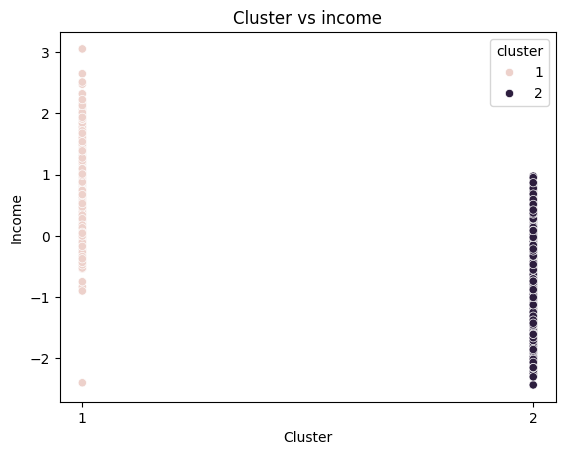

In [35]:
sns.scatterplot(x = 'kmeans_cluster_pred', y = 'Income', hue = 'kmeans_cluster_pred', data = train_data)
plt.legend(title = 'cluster',loc='upper right')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.xticks([1,2])
plt.title('Cluster vs income')
plt.show()

### Cluster 1 have high income

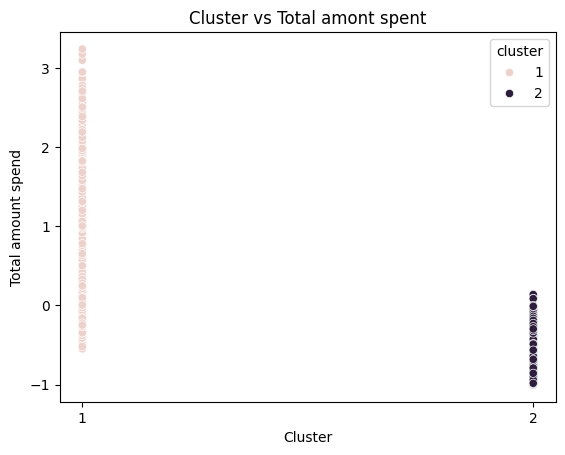

In [36]:
sns.scatterplot(x = 'kmeans_cluster_pred', y = 'Total_amount_spent', hue = 'kmeans_cluster_pred', data = train_data)
plt.legend(title = 'cluster',loc='upper right')
plt.xlabel('Cluster')
plt.ylabel('Total amount spend')
plt.xticks([1,2])
plt.title('Cluster vs Total amont spent')
plt.show()

### cluster 1 spent maximum on products.

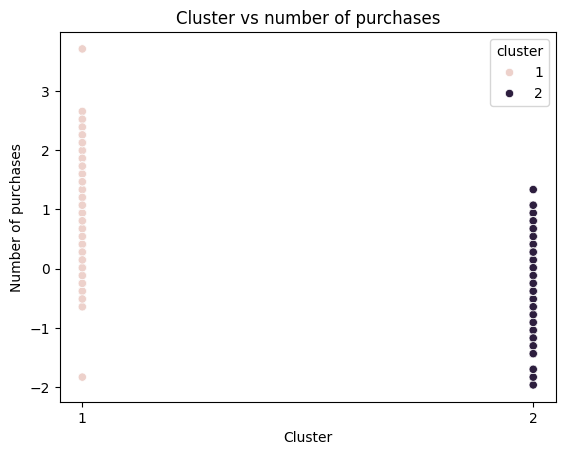

In [37]:
sns.scatterplot(x = 'kmeans_cluster_pred', y = 'Number_of_purchases', hue = 'kmeans_cluster_pred', data = train_data)
plt.legend(title = 'cluster',loc='upper right')
plt.xlabel('Cluster')
plt.ylabel('Number of purchases')
plt.xticks([1,2])
plt.title('Cluster vs number of purchases')
plt.show()

### cluster 1 takes maximum number of purchases.

In [45]:
# Test data with kmeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 'auto')
train_clusters = kmeans.fit_predict(train_data_pca)
test_cluster = kmeans.predict(test_data_pca)
silhouette_test = silhouette_score(test_data_pca, test_cluster)

In [46]:
silhouette_test

np.float64(0.5009073313340807)

In [43]:
# Fit AgglomerativeClustering on the training data
agglo_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
train_clusters = agglo_cluster.fit_predict(train_data_pca)

# Since AgglomerativeClustering does not support prediction on test data, you can fit it on both train and test data
# Fit the model again on the combined data (train + test)
agglo_cluster_combined = AgglomerativeClustering(n_clusters=2, linkage='ward')
combined_clusters = agglo_cluster_combined.fit_predict(np.vstack([train_data_pca, test_data_pca]))

# Separate the clusters for train and test data
train_clusters_combined = combined_clusters[:len(train_data_pca)]
test_clusters_combined = combined_clusters[len(train_data_pca):]

# Now calculate silhouette score for test data
silhouette_test = silhouette_score(test_data_pca, test_clusters_combined)

In [44]:
silhouette_test

np.float64(0.46767556270586685)

# Conclusions

- Cluster 2: Represents customers with lower income and lower spending. This group may consist of price-sensitive or budget-conscious customers.
- Cluster 1: Represents customers with higher income and higher spending. This group may include premium or high-value customers.
- Best cluster is kmeans cluster.

### Targeting Strategy:
- Cluster 2 can be targeted with discounts and budget-friendly products.
- Cluster 1 can be targeted with premium products and loyalty programs.
